In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from word2number import w2n

import scipy.stats as stat
import pylab

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest          ## Feature Engineering
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv(r'D:\PYTHON Practice Projecs\Train_3.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [3]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [4]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [9]:
## Finding most frequent value
df['BsmtQual'].value_counts()


TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [8]:
df['GarageType'].value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [7]:
## df['BsmtQual'] & garage have less number of missing values so we can replace them with most frequent category
df['BsmtQual'].fillna('TA',inplace=True)
df['GarageType'].fillna('Attchd',inplace=True)

In [10]:
## FireplaceQu has some relationship with target feature so it will distort the dataframe
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

## Replacing Nan with most frequent category 

In [12]:
## Using Function to replace with most frequent values
def impute_nan(df,features):
    most_frequent_category = df[features].mode()[0]
    df[features].fillna(most_frequent_category,inplace = True)
    
for features in ['BsmtQual','GarageType']:
    impute_nan(df,features)

## Replace Nan with a new #### category
- Most Commonly used

(Replace Nan with "Missing" which is a new category then drop features )

In [14]:
df = pd.read_csv(r'D:\PYTHON Practice Projecs\Train_3.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [15]:
def impute_nan(df,features):
    df[features+'_new_Var'] = np.where(df[features].isnull(),'Missing',df[features])

for features in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,features)

    
df = df.drop(['BsmtQual','GarageType','FireplaceQu'],axis=1)    

In [16]:
df

,SalePrice,BsmtQual_new_Var,GarageType_new_Var,FireplaceQu_new_Var
0,208500,Gd,Attchd,Missing
1,181500,Gd,Attchd,TA
2,223500,Gd,Attchd,TA
3,140000,TA,Detchd,Gd
4,250000,Gd,Attchd,TA
...,...,...,...,...
1455,175000,Gd,Attchd,TA
1456,210000,Gd,Attchd,TA
1457,266500,TA,Attchd,Gd
1458,142125,TA,Attchd,Missing


In [17]:
df['FireplaceQu_new_Var'].value_counts()

Missing    690
Gd         380
TA         313
Fa          33
Ex          24
Po          20
Name: FireplaceQu_new_Var, dtype: int64

## HANDELING Categorical features
- ONE HOT ENCODING

In [82]:
df = pd.read_excel(r'D:\PYTHON Practice Projecs\Titanc_naive_Bayes.xlsx', usecols= ['Sex'])


In [88]:
pd.get_dummies(df, drop_first=True)   # drop first = true as there are only 2 categories which can be represented by 1 or 0

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [20]:
df = pd.read_excel(r'D:\PYTHON Practice Projecs\Titanc_naive_Bayes.xlsx', usecols= ['Embarked'])

In [21]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
def impute_nan(df,features):
    most_frequent_category = df[features].mode()[0]
    df[features].fillna(most_frequent_category,inplace = True)
    
for features in ['Embarked']:
    impute_nan(df,features)

In [23]:
pd.get_dummies(df,drop_first=True)

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


## ONE HOT ENCODING : When We have many many categories
* NOMINAL

In [26]:
df = pd.read_csv(r'D:\PYTHON Practice Projecs\mercedesbenz.csv', usecols=['X1','X2','X3','X4','X5','X6'])

In [27]:
le = LabelEncoder()
df['X1_lables'] = le.fit_transform(df['X1'] )

In [28]:
df['X1_lables'].value_counts()

1     833
20    598
3     592
13    590
23    408
19    251
10    203
0     143
4     121
16     82
24     52
26     46
22     37
6      33
14     32
21     31
9      29
7      23
25     23
11     22
15     19
12     17
17      9
8       6
18      3
2       3
5       3
Name: X1_lables, dtype: int64

In [29]:
df.X1.value_counts()

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
f      23
y      23
j      22
n      19
k      17
p       9
g       6
d       3
ab      3
q       3
Name: X1, dtype: int64

In [30]:
## Taking top 10 most frequent 
Top_10 = df.X1.value_counts().sort_values(ascending = False).head(10).index
Top_10= list(Top_10)

In [31]:
## TOP 10 
for category in Top_10:
    df[category] = np.where(df['X1'] == category,1,0)

In [32]:
Top_10.append('X1')

In [33]:
Top_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o', 'X1']

In [34]:
df[Top_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


## ORDINAL
e.g. grade, days, rating

## NEW PROJECT  ## FLIGHTS

In [2]:
df = pd.read_excel(r'D:\PYTHON Practice Projecs\Flights.xlsx')

In [3]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145.0,PDX,ANC,194.0,1542.0,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830.0,SEA,CLT,252.0,2279.0,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609.0,PDX,IAH,201.0,1825.0,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466.0,PDX,CLT,251.0,2282.0,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121.0,SEA,ANC,201.0,1448.0,0.0,34.0


In [4]:
df.dtypes

year           int64
month          int64
day            int64
dep_time     float64
dep_delay    float64
arr_time     float64
arr_delay    float64
carrier       object
tailnum       object
flight       float64
origin        object
dest          object
air_time     float64
distance     float64
hour         float64
minute       float64
dtype: object

In [59]:
df.isnull().sum()

year                0
month               0
day                 0
carrier             0
tailnum             0
origin              0
dest                0
flight_median       0
dep_time_random     0
dep_delay_median    0
arr_time_random     0
arr_delay_random    0
air_time_random     0
hour_random         0
minute_random       0
distance_median     0
dtype: int64

In [58]:
df.isnull().mean()

year                0.0
month               0.0
day                 0.0
carrier             0.0
tailnum             0.0
origin              0.0
dest                0.0
flight_median       0.0
dep_time_random     0.0
dep_delay_median    0.0
arr_time_random     0.0
arr_delay_random    0.0
air_time_random     0.0
hour_random         0.0
minute_random       0.0
distance_median     0.0
dtype: float64

In [46]:
median =df['dep_time'].median()
median

1203.0

In [67]:
df.head(3)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,dep_time_median,dep_time_random
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145.0,PDX,ANC,194.0,1542.0,0.0,1.0,1.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830.0,SEA,CLT,252.0,2279.0,0.0,4.0,4.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609.0,PDX,IAH,201.0,1825.0,0.0,8.0,8.0,8.0


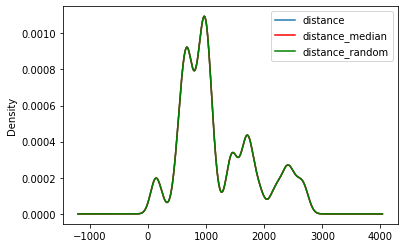

In [50]:
def impute_nan(df,features,median):
    df[features+'_median'] = df[features].fillna(median)
    df[features+'_random'] = df[features]
    # Creating random sample
    random_sample = df[features].dropna().sample(df[features].isnull().sum(),random_state = 0)
    # Matching index
    random_sample.index = df[df[features].isnull()].index
    df.loc[df[features].isnull(),features+'_random']= random_sample

    
median = df['distance'].median()  

impute_nan(df,'distance',median)

## Plotting median & random imputation
fig = plt.figure()
ax = fig.add_subplot(111)
df['distance'].plot(kind='kde', ax=ax)
df.distance_median.plot(kind='kde', ax=ax, color='red')
df.distance_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


In [317]:
df.drop(['air_time','air_time_median'],axis=1,inplace=True)

In [52]:
df.head(3)

,year,month,day,carrier,tailnum,origin,dest,flight_median,dep_time_random,dep_delay_median,arr_time_random,arr_delay_random,air_time_random,hour_random,minute_random,distance_median
0,2014,1,1,AS,N508AS,PDX,ANC,145.0,1.0,96.0,235.0,70.0,194.0,0.0,1.0,1542.0
1,2014,1,1,US,N195UW,SEA,CLT,1830.0,4.0,-6.0,738.0,-23.0,252.0,0.0,4.0,2279.0
2,2014,1,1,UA,N37422,PDX,IAH,1609.0,8.0,13.0,548.0,-4.0,201.0,0.0,8.0,1825.0


In [30]:
df.drop(['arr_time','arr_time_median'],axis=1,inplace=True)

In [47]:
df.drop(['minute','minute_median'],axis=1,inplace=True)

In [39]:
df.drop(['air_time','air_time_median'],axis=1,inplace=True)

In [43]:
df.drop(['hour','hour_median'],axis=1,inplace=True)

In [15]:
df.drop(['dep_time_median','dep_time'],axis=1,inplace=True)

In [51]:
df.drop(['distance','distance_random'],axis=1,inplace=True)

In [28]:
## NUMERIC FEATURES
df.drop(['dep_delay','dep_delay_random'],axis=1,inplace=True)   
df.drop(['flight','flight_random'],axis=1,inplace=True)
df.drop(['arr_time','arr_time_median'],axis=1,inplace=True)
df.drop(['arr_delay','arr_delay_median'],axis=1,inplace=True)
df.drop(['air_time','air_time_median'],axis=1,inplace=True)
df.drop(['hour','hour_median'],axis=1,inplace=True)
df.drop(['minute','minute_median'],axis=1,inplace=True)
df.drop(['distance','distance_random'],axis=1,inplace=True)

KeyError: "['dep_delay' 'dep_delay_random'] not found in axis"

## Categorical Values

In [53]:
df.tailnum = df.tailnum.fillna('N218AG')

In [54]:
df.carrier = df.carrier.fillna('AS')

In [55]:
df.origin=df.origin.fillna('SEA')

In [56]:
df.dest = df.dest.fillna('LAX')

In [57]:
df.dtypes

year                  int64
month                 int64
day                   int64
carrier              object
tailnum              object
origin               object
dest                 object
flight_median       float64
dep_time_random     float64
dep_delay_median    float64
arr_time_random     float64
arr_delay_random    float64
air_time_random     float64
hour_random         float64
minute_random       float64
distance_median     float64
dtype: object

In [295]:
df.head(3)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,distance_median,distance_random
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145.0,PDX,ANC,194.0,1542.0,0.0,1.0,1542.0,1542.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830.0,SEA,CLT,252.0,2279.0,0.0,4.0,2279.0,2279.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609.0,PDX,IAH,201.0,1825.0,0.0,8.0,1825.0,1825.0


## Handeling Features

In [60]:
df.carrier.value_counts().sort_values(ascending=False).head(8)

AS    8742
WN    3124
OO    2705
UA    2376
DL    2267
AA    1069
US     768
VX     493
Name: carrier, dtype: int64

In [62]:
Top_n

['AS', 'WN', 'OO', 'UA', 'DL', 'AA', 'US', 'VX']

In [61]:
## List of most frequent categories in the features
Top_n = [n for n in df.carrier.value_counts().sort_values(ascending=False).head(8).index]
for label in Top_n:
    df[label] = np.where(df['carrier'] == label , 1,0)
    
df[['carrier']+Top_n].head(5)

,carrier,AS,WN,OO,UA,DL,AA,US,VX
0,AS,1,0,0,0,0,0,0,0
1,US,0,0,0,0,0,0,1,0
2,UA,0,0,0,1,0,0,0,0
3,US,0,0,0,0,0,0,1,0
4,AS,1,0,0,0,0,0,0,0


In [69]:
df

,year,month,day,carrier,tailnum,origin,dest,flight_median,dep_time_random,dep_delay_median,...,LAX,DEN,PHX,LAS,ORD,ANC,SJC,SLC,DFW,OAK
0,2014,1,1,AS,N508AS,PDX,ANC,145.0,1.0,96.0,...,0,0,0,0,0,1,0,0,0,0
1,2014,1,1,US,N195UW,SEA,CLT,1830.0,4.0,-6.0,...,0,0,0,0,0,0,0,0,0,0
2,2014,1,1,UA,N37422,PDX,IAH,1609.0,8.0,13.0,...,0,0,0,0,0,0,0,0,0,0
3,2014,1,1,US,N547UW,PDX,CLT,466.0,28.0,-2.0,...,0,0,0,0,0,0,0,0,0,0
4,2014,1,1,AS,N762AS,SEA,ANC,121.0,34.0,44.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,2014,10,24,AS,N796AS,SEA,KTN,69.0,1842.0,-3.0,...,0,0,0,0,0,0,0,0,0,0
22541,2014,10,24,AS,N618AS,SEA,SNA,510.0,1848.0,13.0,...,0,0,0,0,0,0,0,0,0,0
22542,2014,10,24,AS,N319AS,SEA,DEN,678.0,1848.0,-7.0,...,0,1,0,0,0,0,0,0,0,0
22543,2014,10,24,WN,N288WN,SEA,LAS,3935.0,1848.0,-2.0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
## List of most frequent categories in the features
Top_n = [n for n in df.carrier.value_counts().sort_values(ascending=False).head(8).index]
for label in Top_n:
    df[label] = np.where(df['carrier'] == label , 1,0)
    
df[['carrier']+Top_n].head(5)

,carrier,AS,WN,OO,UA,DL,AA,US,VX
0,AS,1,0,0,0,0,0,0,0
1,US,0,0,0,0,0,0,1,0
2,UA,0,0,0,1,0,0,0,0
3,US,0,0,0,0,0,0,1,0
4,AS,1,0,0,0,0,0,0,0


In [357]:
# ORIGIN
df.origin.value_counts().sort_values(ascending=False)

SEA    14931
PDX     7614
Name: origin, dtype: int64

In [74]:
dummy = pd.get_dummies(df1['origin'])

In [75]:
merge = pd.concat([df1,dummy],axis=1)

In [76]:
merge.drop(['PDX'],axis=1,inplace=True)

In [77]:
merge

,year,month,day,carrier,tailnum,origin,dest,flight_median,dep_time_random,dep_delay_median,...,DEN,PHX,LAS,ORD,ANC,SJC,SLC,DFW,OAK,SEA
0,2014,1,1,AS,N508AS,PDX,ANC,145.0,1.0,96.0,...,0,0,0,0,1,0,0,0,0,0
1,2014,1,1,US,N195UW,SEA,CLT,1830.0,4.0,-6.0,...,0,0,0,0,0,0,0,0,0,1
2,2014,1,1,UA,N37422,PDX,IAH,1609.0,8.0,13.0,...,0,0,0,0,0,0,0,0,0,0
3,2014,1,1,US,N547UW,PDX,CLT,466.0,28.0,-2.0,...,0,0,0,0,0,0,0,0,0,0
4,2014,1,1,AS,N762AS,SEA,ANC,121.0,34.0,44.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,2014,10,24,AS,N796AS,SEA,KTN,69.0,1842.0,-3.0,...,0,0,0,0,0,0,0,0,0,1
22541,2014,10,24,AS,N618AS,SEA,SNA,510.0,1848.0,13.0,...,0,0,0,0,0,0,0,0,0,1
22542,2014,10,24,AS,N319AS,SEA,DEN,678.0,1848.0,-7.0,...,1,0,0,0,0,0,0,0,0,1
22543,2014,10,24,WN,N288WN,SEA,LAS,3935.0,1848.0,-2.0,...,0,0,1,0,0,0,0,0,0,1


In [70]:
df1 = df.copy()

In [71]:
df1

,year,month,day,carrier,tailnum,origin,dest,flight_median,dep_time_random,dep_delay_median,...,LAX,DEN,PHX,LAS,ORD,ANC,SJC,SLC,DFW,OAK
0,2014,1,1,AS,N508AS,PDX,ANC,145.0,1.0,96.0,...,0,0,0,0,0,1,0,0,0,0
1,2014,1,1,US,N195UW,SEA,CLT,1830.0,4.0,-6.0,...,0,0,0,0,0,0,0,0,0,0
2,2014,1,1,UA,N37422,PDX,IAH,1609.0,8.0,13.0,...,0,0,0,0,0,0,0,0,0,0
3,2014,1,1,US,N547UW,PDX,CLT,466.0,28.0,-2.0,...,0,0,0,0,0,0,0,0,0,0
4,2014,1,1,AS,N762AS,SEA,ANC,121.0,34.0,44.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,2014,10,24,AS,N796AS,SEA,KTN,69.0,1842.0,-3.0,...,0,0,0,0,0,0,0,0,0,0
22541,2014,10,24,AS,N618AS,SEA,SNA,510.0,1848.0,13.0,...,0,0,0,0,0,0,0,0,0,0
22542,2014,10,24,AS,N319AS,SEA,DEN,678.0,1848.0,-7.0,...,0,1,0,0,0,0,0,0,0,0
22543,2014,10,24,WN,N288WN,SEA,LAS,3935.0,1848.0,-2.0,...,0,0,0,1,0,0,0,0,0,0


In [87]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 50

In [72]:
df1.columns

Index(['year', 'month', 'day', 'carrier', 'tailnum', 'origin', 'dest',
       'flight_median', 'dep_time_random', 'dep_delay_median',
       'arr_time_random', 'arr_delay_random', 'air_time_random', 'hour_random',
       'minute_random', 'distance_median', 'AS', 'WN', 'OO', 'UA', 'DL', 'AA',
       'US', 'VX', 'SFO', 'LAX', 'DEN', 'PHX', 'LAS', 'ORD', 'ANC', 'SJC',
       'SLC', 'DFW', 'OAK'],
      dtype='object')

In [67]:
# DESTINATION
df.dest.value_counts().sort_values(ascending=False).head(11)

SFO    1898
LAX    1504
DEN    1428
PHX    1247
LAS    1123
ORD    1010
ANC     898
SJC     875
SLC     851
DFW     801
OAK     789
Name: dest, dtype: int64

In [73]:
df1.OAK.value_counts()

0    21756
1      789
Name: OAK, dtype: int64

In [68]:
## List of most frequent categories in the features
Top_n = [n for n in df.dest.value_counts().sort_values(ascending=False).head(11).index]
for label in Top_n:
    df[label] = np.where(df['dest'] == label , 1,0)
    
df[['dest']+Top_n].head(5)

,dest,SFO,LAX,DEN,PHX,LAS,ORD,ANC,SJC,SLC,DFW,OAK
0,ANC,0,0,0,0,0,0,1,0,0,0,0
1,CLT,0,0,0,0,0,0,0,0,0,0,0
2,IAH,0,0,0,0,0,0,0,0,0,0,0
3,CLT,0,0,0,0,0,0,0,0,0,0,0
4,ANC,0,0,0,0,0,0,1,0,0,0,0


In [448]:
merge

,year,month,day,carrier,tailnum,origin,dest,distance_median,dep_time_random,dep_delay_median,arr_time_random,arr_delay_random,air_time_random,hour_random,minute_random,flight_median,AS,WN,OO,UA,DL,AA,US,VX,SFO,LAX,DEN,PHX,LAS,ORD,ANC,SJC,SLC,DFW,OAK,SEA
0,2014,1,1,AS,N508AS,PDX,ANC,1542.0,1.0,96.0,235.0,70.0,194.0,0.0,1.0,145.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2014,1,1,US,N195UW,SEA,CLT,2279.0,4.0,-6.0,738.0,-23.0,252.0,0.0,4.0,1830.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2014,1,1,UA,N37422,PDX,IAH,1825.0,8.0,13.0,548.0,-4.0,201.0,0.0,8.0,1609.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014,1,1,US,N547UW,PDX,CLT,2282.0,28.0,-2.0,800.0,-23.0,251.0,0.0,28.0,466.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014,1,1,AS,N762AS,SEA,ANC,1448.0,34.0,44.0,325.0,43.0,201.0,0.0,34.0,121.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,2014,10,24,AS,N796AS,SEA,KTN,680.0,1842.0,-3.0,1937.0,-8.0,97.0,18.0,42.0,69.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22541,2014,10,24,AS,N618AS,SEA,SNA,978.0,1848.0,13.0,2146.0,38.0,151.0,18.0,48.0,510.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22542,2014,10,24,AS,N319AS,SEA,DEN,1024.0,1848.0,-7.0,2209.0,-11.0,120.0,18.0,48.0,678.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
22543,2014,10,24,WN,N288WN,SEA,LAS,867.0,1848.0,-2.0,2118.0,3.0,129.0,18.0,48.0,3935.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [103]:
final.columns

Index(['year', 'month', 'day', 'tailnum', 'flight_median', 'dep_time_random',
       'dep_delay_median', 'arr_time_random', 'arr_delay_random',
       'air_time_random', 'hour_random', 'distance_median', 'AS', 'WN', 'OO',
       'UA', 'DL', 'AA', 'US', 'VX', 'SFO', 'LAX', 'DEN', 'PHX', 'LAS', 'ORD',
       'ANC', 'SJC', 'SLC', 'DFW', 'OAK', 'SEA'],
      dtype='object')

In [79]:
final = merge.drop(['origin','dest','carrier'],axis=1)

In [80]:
final.shape

(22545, 33)

In [99]:
final.head(100)

,year,month,day,tailnum,flight_median,dep_time_random,dep_delay_median,arr_time_random,arr_delay_random,air_time_random,hour_random,distance_median,AS,WN,OO,UA,DL,AA,US,VX,SFO,LAX,DEN,PHX,LAS,ORD,ANC,SJC,SLC,DFW,OAK,SEA
0,2014,1,1,N508AS,145.0,1.0,96.0,235.0,70.0,194.0,0.016667,1542.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2014,1,1,N195UW,1830.0,4.0,-6.0,738.0,-23.0,252.0,0.066667,2279.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2014,1,1,N37422,1609.0,8.0,13.0,548.0,-4.0,201.0,0.133334,1825.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014,1,1,N547UW,466.0,28.0,-2.0,800.0,-23.0,251.0,0.466668,2282.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014,1,1,N762AS,121.0,34.0,44.0,325.0,43.0,201.0,0.566668,1448.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2014,1,1,N305AS,28.0,825.0,-5.0,1436.0,15.0,202.0,8.416667,1721.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
96,2014,1,1,N584NW,588.0,825.0,0.0,1352.0,10.0,162.0,8.416667,1399.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
97,2014,1,1,N38446,1510.0,827.0,2.0,1414.0,-16.0,210.0,8.450001,1825.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,2014,1,1,N563AS,861.0,829.0,-1.0,1228.0,-22.0,338.0,8.483334,2640.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [98]:
final.drop(['minute_random'],axis=1,inplace=True)

In [93]:
final.minute_random = final.minute_random*0.0166667

In [95]:
final['hour_random'] = final['hour_random']+ final['minute_random']

In [82]:
final.ANC.value_counts()

0    21647
1      898
Name: ANC, dtype: int64

In [84]:
final.to_excel(r'D:\PYTHON Practice Projecs\FINAL_flIGHTS_train.xlsx')

In [352]:
x = final1.iloc[:,3:11]

In [121]:
y = final1.air_time_random

In [344]:
final1.drop(['tailnum'],axis=1,inplace=True)

In [347]:
final2 = final1.copy()

In [348]:
## Change columns orders 
final1 = final1[['year', 'month', 'day','dep_time_random','dep_delay_median_log','flight_median_BoxCox','arr_time_random',
       'arr_delay_random', 'air_time_random', 'hour_random', 'distance_median','AS', 'WN', 'OO', 'UA', 'DL', 'AA', 'US', 'VX', 'SFO', 'LAX', 'DEN',
       'PHX', 'LAS', 'ORD', 'ANC', 'SJC', 'SLC', 'DFW', 'OAK', 'SEA']]

In [349]:
final1.columns

Index(['year', 'month', 'day', 'dep_time_random', 'dep_delay_median_log',
       'flight_median_BoxCox', 'arr_time_random', 'arr_delay_random',
       'air_time_random', 'hour_random', 'distance_median', 'AS', 'WN', 'OO',
       'UA', 'DL', 'AA', 'US', 'VX', 'SFO', 'LAX', 'DEN', 'PHX', 'LAS', 'ORD',
       'ANC', 'SJC', 'SLC', 'DFW', 'OAK', 'SEA'],
      dtype='object')

In [353]:
x 

,dep_time_random,dep_delay_median_log,flight_median_BoxCox,arr_time_random,arr_delay_random,air_time_random,hour_random,distance_median
0,1.0,1.247915,12.346162,235.0,70.0,194.0,0.016667,1542.0
1,4.0,1.674669,29.191127,738.0,-23.0,252.0,0.066667,2279.0
2,8.0,1.656927,28.164849,548.0,-4.0,201.0,0.133334,1825.0
3,28.0,1.467526,19.222441,800.0,-23.0,251.0,0.466668,2282.0
4,34.0,1.208966,11.414121,325.0,43.0,201.0,0.566668,1448.0
...,...,...,...,...,...,...,...,...
22540,1842.0,1.076955,8.748374,1937.0,-8.0,97.0,18.700001,680.0
22541,1848.0,1.482613,19.816259,2146.0,38.0,151.0,18.800002,978.0
22542,1848.0,1.528765,21.749153,2209.0,-11.0,120.0,18.800002,1024.0
22543,1848.0,1.774117,35.676580,2118.0,3.0,129.0,18.800002,867.0


In [355]:
final1

,year,month,day,dep_time_random,dep_delay_median_log,flight_median_BoxCox,arr_time_random,arr_delay_random,air_time_random,hour_random,distance_median,AS,WN,OO,UA,DL,AA,US,VX,SFO,LAX,DEN,PHX,LAS,ORD,ANC,SJC,SLC,DFW,OAK,SEA
0,2014,1,1,1.0,1.247915,12.346162,235.0,70.0,194.0,0.016667,1542.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2014,1,1,4.0,1.674669,29.191127,738.0,-23.0,252.0,0.066667,2279.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2014,1,1,8.0,1.656927,28.164849,548.0,-4.0,201.0,0.133334,1825.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014,1,1,28.0,1.467526,19.222441,800.0,-23.0,251.0,0.466668,2282.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014,1,1,34.0,1.208966,11.414121,325.0,43.0,201.0,0.566668,1448.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,2014,10,24,1842.0,1.076955,8.748374,1937.0,-8.0,97.0,18.700001,680.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22541,2014,10,24,1848.0,1.482613,19.816259,2146.0,38.0,151.0,18.800002,978.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22542,2014,10,24,1848.0,1.528765,21.749153,2209.0,-11.0,120.0,18.800002,1024.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
22543,2014,10,24,1848.0,1.774117,35.676580,2118.0,3.0,129.0,18.800002,867.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


## PEARSON CORR With Heatmap
- distance_median vs air_time_random
- dep_time_randon vs hour_random
- arr_delay_random vs dep_delay_median


<AxesSubplot:>

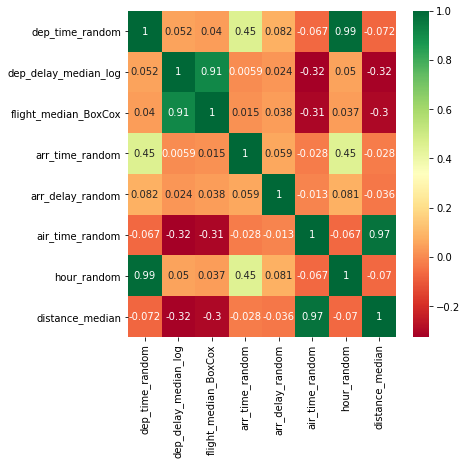

In [354]:
corr_mat = x.corr()

top_corr_features = corr_mat.index

plt.figure(figsize=(6,6))

sns.heatmap(x[top_corr_features].corr(),annot=True, cmap = 'RdYlGn' )

In [140]:
final1.drop('tailnum',axis=1,inplace=True)

In [180]:
final1 = final.copy()

## Transformation of features / Normalising

- Normalizing and standardisation 
- Scaling to min and max values  (MinMaxScaler)
- Scaling to median and quantiles (Robust)
- Gaussian transformation (exponential ,logrithmic, reciprocal, square root, Box cox)

In [126]:
## STANDARD SCALER
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [127]:
x_scaled

array([[-0.79977025, -2.46221803,  3.08327165, ...,  0.60431599,
        -2.50131549,  0.53547634],
       [ 0.31522732, -2.45633675, -0.40323996, ...,  1.40761538,
        -2.49151007,  1.66835755],
       [ 0.16898728, -2.44849506,  0.24620828, ...,  0.70126591,
        -2.47843617,  0.97049043],
       ...,
       [-0.44707369,  1.158686  , -0.43742144, ..., -0.42058324,
         1.18224892, -0.26076852],
       [ 1.70814714,  1.158686  , -0.26651401, ..., -0.29593333,
         1.18224892, -0.50210142],
       [-0.43714789,  1.16260685, -0.36905847, ..., -0.68373304,
        -1.15797457, -0.31149455]])

In [142]:
## MIN MAX SCALER (0-1)
scaler_2 = MinMaxScaler()
final1_scaled2 = pd.DataFrame(scaler_2.fit_transform(final1),columns=final1.columns)

In [216]:
final1_scaled2

,year,month,day,flight_median,dep_time_random,dep_delay_median,arr_time_random,arr_delay_random,air_time_random,hour_random,distance_median,AS,WN,OO,UA,DL,AA,US,VX,SFO,LAX,DEN,PHX,LAS,ORD,ANC,SJC,SLC,DFW,OAK,SEA
0,0.0,0.0,0.000000,0.021916,0.000000,0.133858,0.097541,0.141907,0.437340,0.000000,0.548510,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.280153,0.001251,0.019123,0.307211,0.038803,0.585678,0.002085,0.830023,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.000000,0.246284,0.002918,0.040495,0.228012,0.059867,0.455243,0.004864,0.656608,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.071111,0.011255,0.023622,0.333055,0.038803,0.583120,0.018763,0.831169,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.018238,0.013756,0.075366,0.135056,0.111973,0.455243,0.022933,0.512605,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,0.0,1.0,0.766667,0.010268,0.767403,0.022497,0.807003,0.055432,0.189258,0.779013,0.219251,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22541,0.0,1.0,0.766667,0.077854,0.769904,0.040495,0.894123,0.106430,0.327366,0.783183,0.333079,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22542,0.0,1.0,0.766667,0.103602,0.769904,0.017998,0.920383,0.052106,0.248082,0.783183,0.350649,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22543,0.0,1.0,0.766667,0.602759,0.769904,0.023622,0.882451,0.067627,0.271100,0.783183,0.290680,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Robust Scaler >>> scaling feature to median and quantile
IQR 75 quantile - 25 quantile
- Outliers are getting skipped

In [146]:
## ROBUST SCALER
scaler_robust = RobustScaler()
final1_robust = pd.DataFrame(scaler_robust.fit_transform(final1), columns=final1.columns) 

In [165]:
GT = final1_robust.copy()

<AxesSubplot:>

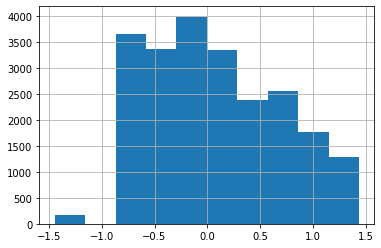

In [228]:
final1_robust.hour_random.hist()

In [223]:
final1

,year,month,day,tailnum,flight_median,dep_time_random,dep_delay_median,arr_time_random,arr_delay_random,air_time_random,hour_random,distance_median,AS,WN,OO,UA,DL,AA,US,VX,SFO,LAX,DEN,PHX,LAS,ORD,ANC,SJC,SLC,DFW,OAK,SEA,arr_time_random_log,flight_median_reciprocal,flight_median_sqroot,flight_median_exponential
0,2014,1,1,N508AS,12.131789,1.0,96.0,235.0,70.0,194.0,0.016667,1542.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.459586,0.200935,2.230859,3.808790
1,2014,1,1,N195UW,28.483857,4.0,-6.0,738.0,-23.0,252.0,0.066667,2279.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,6.603944,0.133119,2.740816,5.367842
2,2014,1,1,N37422,27.490853,8.0,13.0,548.0,-4.0,201.0,0.133334,1825.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.306275,0.135440,2.717235,5.291094
3,2014,1,1,N547UW,18.822469,28.0,-2.0,800.0,-23.0,251.0,0.466668,2282.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.684612,0.162755,2.478747,4.539977
4,2014,1,1,N762AS,11.222633,34.0,44.0,325.0,43.0,201.0,0.566668,1448.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,5.783825,0.208516,2.189929,3.693036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,2014,10,24,N796AS,8.618489,1842.0,-3.0,1937.0,-8.0,97.0,18.700001,680.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.568896,0.236177,2.057694,3.328906
22541,2014,10,24,N618AS,19.399094,1848.0,13.0,2146.0,38.0,151.0,18.800002,978.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.671361,0.160400,2.496880,4.595465
22542,2014,10,24,N319AS,21.274943,1848.0,-7.0,2209.0,-11.0,120.0,18.800002,1024.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,7.700295,0.153394,2.553262,4.769714
22543,2014,10,24,N288WN,34.751886,1848.0,-2.0,2118.0,3.0,129.0,18.800002,867.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,7.658228,0.120807,2.877093,5.820004


In [147]:
final1_robust

,year,month,day,flight_median,dep_time_random,dep_delay_median,arr_time_random,arr_delay_random,air_time_random,hour_random,distance_median,AS,WN,OO,UA,DL,AA,US,VX,SFO,LAX,DEN,PHX,LAS,ORD,ANC,SJC,SLC,DFW,OAK,SEA
0,0.0,0.0,-0.928571,-0.427124,-1.464068,10.888889,-1.757241,3.947368,0.715789,-1.444,0.567456,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,-0.928571,0.886204,-1.460414,-0.444444,-1.063448,-0.947368,1.326316,-1.438,1.326468,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,-0.928571,0.713952,-1.455542,1.666667,-1.325517,0.052632,0.789474,-1.430,0.858908,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.0,0.0,-0.928571,-0.176929,-1.431181,0.000000,-0.977931,-0.947368,1.315789,-1.390,1.329557,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,-0.928571,-0.445830,-1.423873,5.111111,-1.633103,2.526316,0.789474,-1.378,0.470649,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,0.0,1.0,0.714286,-0.486360,0.778319,-0.111111,0.590345,-0.157895,-0.305263,0.798,-0.320288,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22541,0.0,1.0,0.714286,-0.142634,0.785627,1.666667,0.878621,2.263158,0.263158,0.810,-0.013388,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22542,0.0,1.0,0.714286,-0.011691,0.785627,-0.555556,0.965517,-0.315789,-0.063158,0.810,0.033986,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22543,0.0,1.0,0.714286,2.526890,0.785627,0.000000,0.840000,0.421053,0.031579,0.810,-0.127703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Guassian Transformation (Convert left / Right skewed to normal dist )

We want data to be normally distributed of other algo (like linear, logistic) gives more accuracy 

flight_median,   dep_delay_median,     arr_delay_random  >>>> Right skewed 

In [253]:
## If we want to check if features are normally / guassian distributed
## We use Q-Q Plot
def plot_data(df,features):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[features].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[features],dist='norm',plot=pylab)
    plt.show()


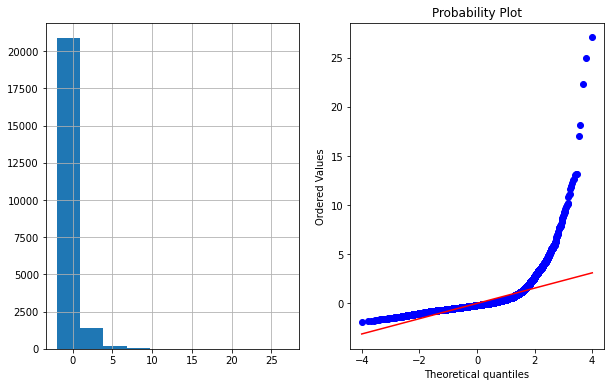

In [317]:
plot_data(final2,'arr_delay_random_std_scaler')

flight_median,   dep_delay_median,     arr_delay_random

ValueError: supplied range of [-inf, 6.738152494595957] is not finite

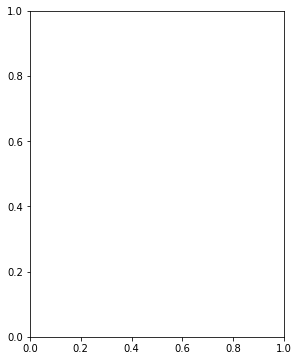

In [321]:
## Logrithimic Transformation  (WIll WORK WELL WHEN DATA IS SKEWED LEFT OR RIGHT)
final1['arr_delay_random_log'] = np.log(final1['arr_delay_random'])
plot_data(final1,'arr_delay_random_log')

ValueError: supplied range of [-1.0, inf] is not finite

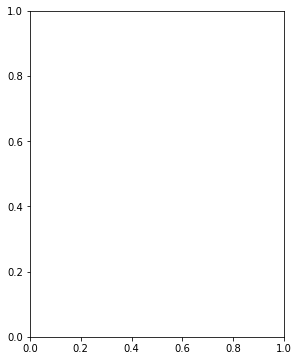

In [295]:
## Reciprocal Transformation
final1['arr_delay_random_reciprocal'] = 1/final1.arr_delay_random
plot_data(final1,'arr_delay_random_reciprocal')

## NOT normally distributed (right skewed)

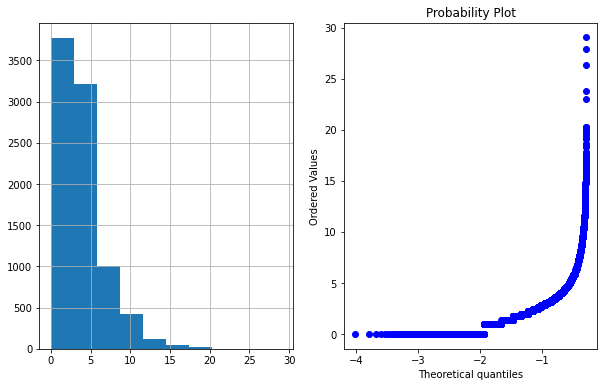

In [296]:
## SQuare Root Transformation
final1['arr_delay_random_sqroot'] = final1.arr_delay_random**(1/2)
plot_data(final1,'arr_delay_random_sqroot')

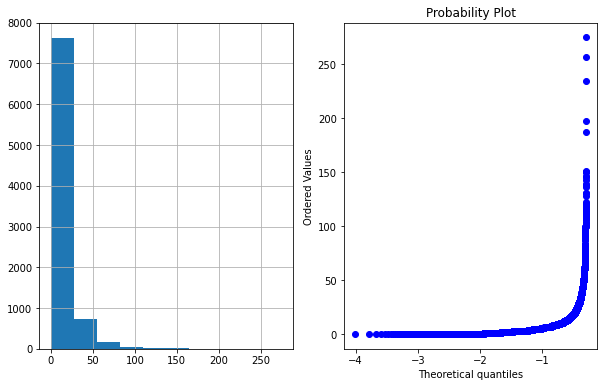

In [297]:
## Exponential Transformaton
final1['arr_delay_random_exponential'] = final1.arr_delay_random**(1/1.2)
plot_data(final1,'arr_delay_random_exponential')

In [307]:
## BOX Cox Transformation (IMP)
final1['arr_delay_random_BoxCox'],parameters = stat.boxcox(final1['arr_delay_random'])   ## add +1 if data is not positive

ValueError: Data must be positive.

In [300]:
print(parameters)

8.472135811722177


KeyError: 'arr_delay_random_BoxCox'

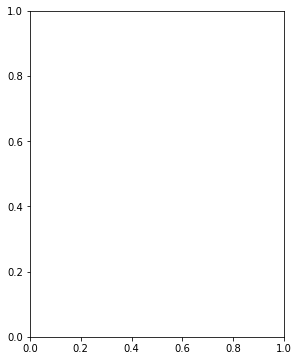

In [301]:
plot_data(final1,'arr_delay_random_BoxCox')

In [357]:
bfinal1

,year,month,day,dep_time_random,dep_delay_median_log,flight_median_BoxCox,arr_time_random,arr_delay_random,air_time_random,hour_random,distance_median,AS,WN,OO,UA,DL,AA,US,VX,SFO,LAX,DEN,PHX,LAS,ORD,ANC,SJC,SLC,DFW,OAK,SEA
0,2014,1,1,1.0,1.247915,12.346162,235.0,70.0,194.0,0.016667,1542.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2014,1,1,4.0,1.674669,29.191127,738.0,-23.0,252.0,0.066667,2279.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2014,1,1,8.0,1.656927,28.164849,548.0,-4.0,201.0,0.133334,1825.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014,1,1,28.0,1.467526,19.222441,800.0,-23.0,251.0,0.466668,2282.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014,1,1,34.0,1.208966,11.414121,325.0,43.0,201.0,0.566668,1448.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,2014,10,24,1842.0,1.076955,8.748374,1937.0,-8.0,97.0,18.700001,680.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22541,2014,10,24,1848.0,1.482613,19.816259,2146.0,38.0,151.0,18.800002,978.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22542,2014,10,24,1848.0,1.528765,21.749153,2209.0,-11.0,120.0,18.800002,1024.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
22543,2014,10,24,1848.0,1.774117,35.676580,2118.0,3.0,129.0,18.800002,867.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [359]:
final_ = final1.copy()

In [360]:
final_

,year,month,day,dep_time_random,dep_delay_median_log,flight_median_BoxCox,arr_time_random,arr_delay_random,air_time_random,hour_random,distance_median,AS,WN,OO,UA,DL,AA,US,VX,SFO,LAX,DEN,PHX,LAS,ORD,ANC,SJC,SLC,DFW,OAK,SEA
0,2014,1,1,1.0,1.247915,12.346162,235.0,70.0,194.0,0.016667,1542.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2014,1,1,4.0,1.674669,29.191127,738.0,-23.0,252.0,0.066667,2279.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2014,1,1,8.0,1.656927,28.164849,548.0,-4.0,201.0,0.133334,1825.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014,1,1,28.0,1.467526,19.222441,800.0,-23.0,251.0,0.466668,2282.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014,1,1,34.0,1.208966,11.414121,325.0,43.0,201.0,0.566668,1448.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,2014,10,24,1842.0,1.076955,8.748374,1937.0,-8.0,97.0,18.700001,680.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22541,2014,10,24,1848.0,1.482613,19.816259,2146.0,38.0,151.0,18.800002,978.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22542,2014,10,24,1848.0,1.528765,21.749153,2209.0,-11.0,120.0,18.800002,1024.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
22543,2014,10,24,1848.0,1.774117,35.676580,2118.0,3.0,129.0,18.800002,867.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [361]:
final_.to_excel(r'D:\PYTHON Practice Projecs\FINAL_flIGHTS_train.xlsx')